In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

### Handwritten Letter & Digit Recognition using KNN on Extended MNIST Dataset

In [20]:
# Function to fix orientation for all images
def fix_orientation(X):
    return np.array([x.reshape(28,28, order='F').flatten() for x in X])

Fixing EMNIST orientation...
Data shape: (131600, 784)
Number of samples: 131600, Number of classes: 47


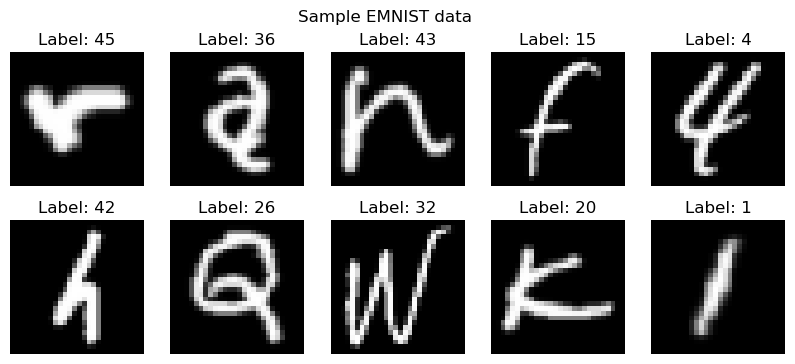

In [21]:
# Load EMNIST-balaced dataset, which includes:
#   - 47 classes total
#       - Digits: 0–9
#       - Uppercase letters: A–Z
#       - Lowercase letters: a–z
#   - but ambiguous lowercase/uppercase classes are merged, e.g.,
#       - 'C' and 'c' => one class
#       - 'O' and 'o' => one class
#       - 'I' and 'l' => one class
# That's why the total is 47 classes instead of 62.
# 
emnist = fetch_openml(name='EMNIST_Balanced', version=1, as_frame=False)

X_raw = emnist["data"]
y = emnist["target"].astype(np.int32)  # labels are strings, convert to int

print("Fixing EMNIST orientation...")
X = fix_orientation(X_raw)

print(f"Data shape: {X.shape}")
print(f"Number of samples: {len(X)}, Number of classes: {len(np.unique(y))}")

# Display a few example digits
fig, ax = plt.subplots(2, 5, figsize=(10, 4))
for i, axi in enumerate(ax.flat):
    axi.imshow(X[i].reshape(28, 28), cmap='gray')
    axi.set_title(f"Label: {y[i]}")
    axi.axis('off')
plt.suptitle("Sample EMNIST data")
plt.show()